# Data Analytics Project: Titanic Dataset

Language: Python

Dataset name: Titanic - Machine Learning from Disaster

From: https://www.kaggle.com/competitions/titanic/data?select=test.csv

## 1. Load the Necessary Libraries

In [ ]:
# load libraries

## data manipulation and transformation
import pandas as pd
import numpy as np

## data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## machine learning
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler # for scaling

## 2. Load the Dataset

In [87]:
# load dataset
df = pd.read_csv("train.csv")

## 3. Preview the Dataset

In [88]:
# preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
# get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Convert Data Types

In [90]:
# convert data types and store in df1

## make a copy of df
df1 = df.copy()

## define function to convert type
def convert_type(data, column, type):
    data[column] = data[column].astype(type)

## instantiate a list of columns to convert
columns_to_convert = ["Survived", "Pclass", "Embarked"]

## use for loop to convert the columns
for x in columns_to_convert:
    convert_type(df1, x, "category")

## check the results
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


## 5. Handle NA

In [91]:
# check the number of NA

## make a copy of df1
df2 = df1.copy()

## show the sum of NA in each column
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 5.1 Age

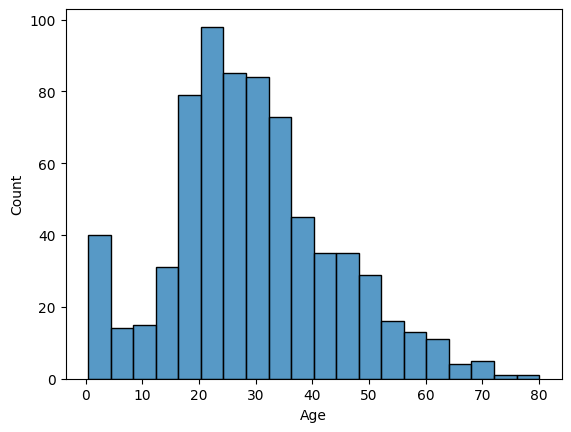

In [92]:
# check `age` distribution
sns.histplot(data=df2,
             x="Age")

plt.show()

In [93]:
# impute NA in `Age` with median since `Age` is slightly skewed
df2["Age"].fillna(df2["Age"].median(), inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 65.8+ KB


C:\Users\sam_h\AppData\Local\Temp\ipykernel_16608\1599255348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Age"].fillna(df2["Age"].median(), inplace=True)


### 5.2 Cabin

In [94]:
# drop `Cabin` since it's mostly empty
df2.drop(columns=["Cabin"], inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.8+ KB


## 5.3 Embarked

In [95]:
# fill NA in `Embarked` with mode
df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)

# check results
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.8+ KB


C:\Users\sam_h\AppData\Local\Temp\ipykernel_16608\2755618746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)


In [96]:
# check if any NA is left
df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 6. Explore the Dataset

In [97]:
# get summary stats

## make a copy of df2
df3 = df2.copy()

## describe the dataset
df3.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208
std,257.353842,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Based on the results:

(1) Skewness
- `SibSp`: positively skewed
- `Parch`: positively skewed
- `Fare`: positively skewed

(2) Spread
- `Fare`

(3) Outliers
- `Age`: min outliers

### 6.1 Handle Skewness

In [98]:
# log-transform `SibSp`, `Parch`, and `Fare`

## instantiate a list of columns to log-transform
col_to_log_transform = ["SibSp", "Parch", "Fare"]

## for loop through the list
for x in col_to_log_transform:
    df3[x + "_log"] = np.log1p(df3[x])

In [99]:
## check the results

### before log transformation
df3[["SibSp", "Parch", "Fare"]].skew()

SibSp    3.695352
Parch    2.749117
Fare     4.787317
dtype: float64

In [100]:
### after log transformation
df3[["SibSp_log", "Parch_log", "Fare_log"]].skew()

SibSp_log    1.661245
Parch_log    1.675439
Fare_log     0.394928
dtype: float64

Based on the results:

- `SibSp_log`: moderately skewed 
- `Parch_log`: moderately skewed
- `Fare_log`: relatively normally distributed

### 6.2 Handle Outliers

In [101]:
# make a copy of df3
df4 = df3.copy()

In [102]:
# check summary stats
df4.describe()

,PassengerId,Age,SibSp,Parch,Fare,SibSp_log,Parch_log,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208,0.281839,0.217682,2.962246
std,257.353842,13.019697,1.102743,0.806057,49.693429,0.462838,0.411680,0.969048
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,2.187218
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,2.737881
75%,668.500000,35.000000,1.000000,0.000000,31.000000,0.693147,0.000000,3.465736
max,891.000000,80.000000,8.000000,6.000000,512.329200,2.197225,1.945910,6.240917


Based on the results, column with potential outliers is `Age`.

<Axes: xlabel='Age'>

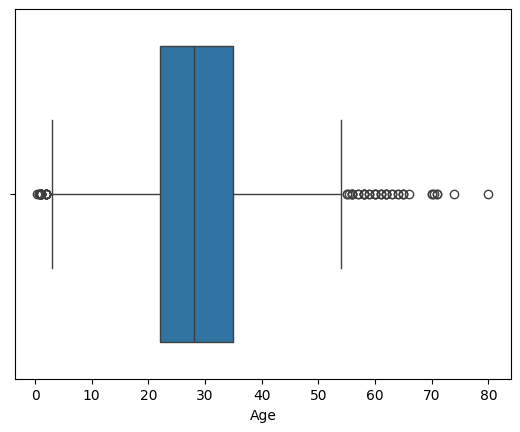

In [103]:
# visualise `Age`
sns.boxplot(data=df4, x="Age")

<Axes: xlabel='Age'>

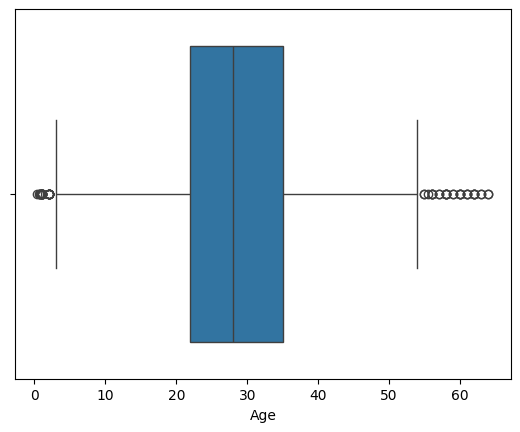

In [104]:
# remove outlier from `Age`

## calculate Q1 and Q1
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)

## IQR
iqr = q3 - q1

## calculate lowerbound and upperbound
lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)

## filter out outliers
df5 = df4[(df4["Age"] >= lower) & (df4["Age"] <= upper)]

# check results with box plot
sns.boxplot(data=df5, x="Age")

### 6.3 Explore the Relationships Between Independent and Dependent Variables

#### 6.3.1 Main Effects

In [105]:
# get info on df5
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  880 non-null    int64   
 1   Survived     880 non-null    category
 2   Pclass       880 non-null    category
 3   Name         880 non-null    object  
 4   Sex          880 non-null    object  
 5   Age          880 non-null    float64 
 6   SibSp        880 non-null    int64   
 7   Parch        880 non-null    int64   
 8   Ticket       880 non-null    object  
 9   Fare         880 non-null    float64 
 10  Embarked     880 non-null    category
 11  SibSp_log    880 non-null    float64 
 12  Parch_log    880 non-null    float64 
 13  Fare_log     880 non-null    float64 
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 85.5+ KB


In [106]:
# visualise categorical independent variables (IVs) and dependent variable (DV)

## define a function to plot cat IV and DV
def cat_plot(iv, dv, data):
    
    # create the plot
    sns.countplot(x=iv,
                  hue=dv,
                  data=data)
    
    # add title and axis labels
    plt.title(iv + " vs " + dv)
    plt.xlabel(iv)
    plt.ylabel(dv)
    
    # show the plot
    plt.show()

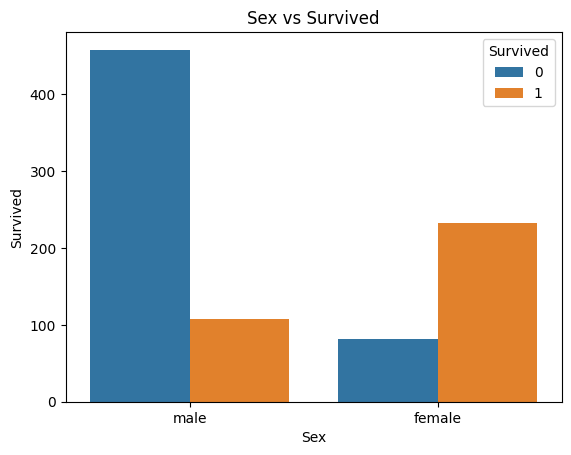

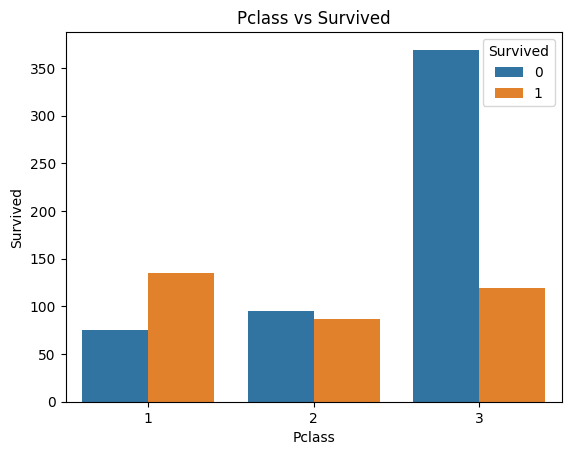

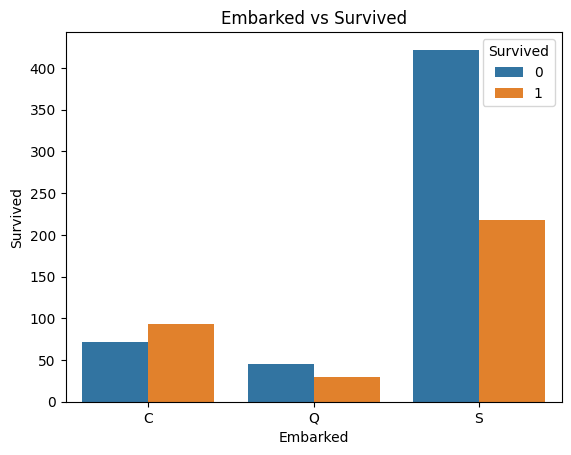

In [107]:
## instantiate the list of categorical variables
cat_ivs = ["Sex", "Pclass", "Embarked"]
    
## for look through the list
for iv in cat_ivs:
    cat_plot(iv, "Survived", df5)

Based on the results:
- `Sex`: Males had higher chance of dying.
- `Pclass`: Class 3 had higher chance of dying.
- `Embarked`: Those boarding from Southampton had a higher chance of dying.

In [108]:
# get info
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  880 non-null    int64   
 1   Survived     880 non-null    category
 2   Pclass       880 non-null    category
 3   Name         880 non-null    object  
 4   Sex          880 non-null    object  
 5   Age          880 non-null    float64 
 6   SibSp        880 non-null    int64   
 7   Parch        880 non-null    int64   
 8   Ticket       880 non-null    object  
 9   Fare         880 non-null    float64 
 10  Embarked     880 non-null    category
 11  SibSp_log    880 non-null    float64 
 12  Parch_log    880 non-null    float64 
 13  Fare_log     880 non-null    float64 
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 85.5+ KB


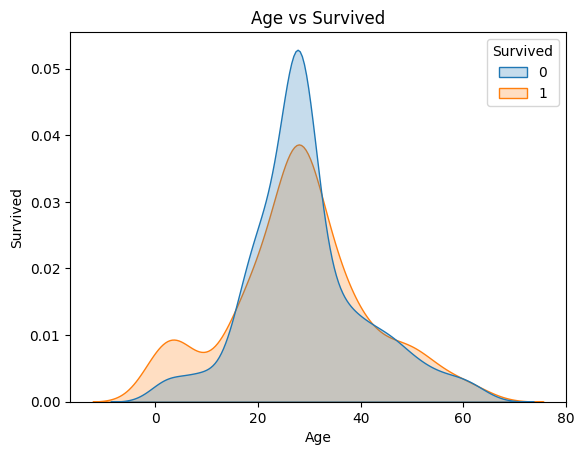

In [109]:
# visualise numeric IVs and DV

## `Age` vs `Survived`
sns.kdeplot(x="Age",
            hue="Survived",
            data=df5,
            fill=True,
            common_norm=False)

plt.title("Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Survived")

plt.show()

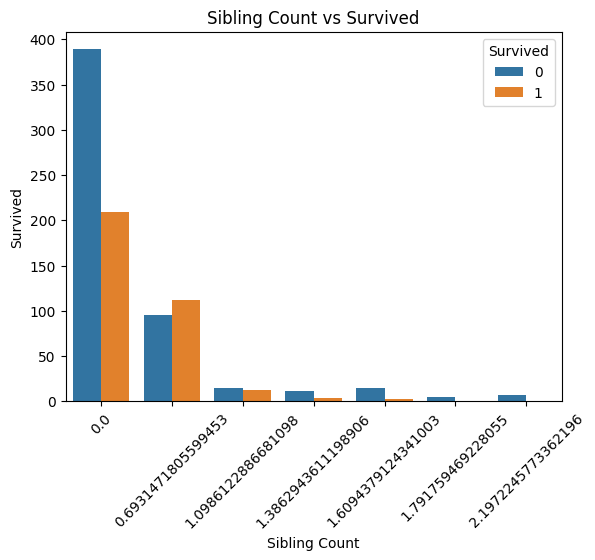

In [110]:
## `SibSp_log` vs `Survived`
sns.countplot(x="SibSp_log",
             data=df5,
             hue="Survived",
             order=sorted(df5["SibSp_log"].unique()))

plt.title("Sibling Count vs Survived")
plt.xlabel("Sibling Count")
plt.ylabel("Survived")
plt.xticks(rotation=45)

plt.show()

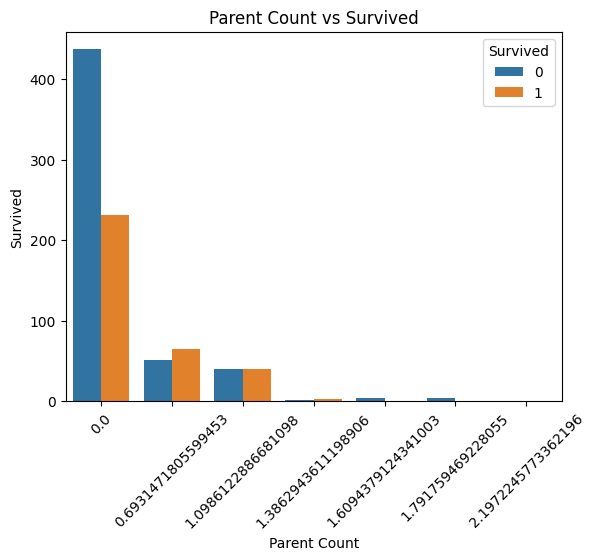

In [111]:
## `Parch_log` vs `Survived`
sns.countplot(x="Parch_log",
             data=df5,
             hue="Survived",
             order=sorted(df5["SibSp_log"].unique()))

plt.title("Parent Count vs Survived")
plt.xlabel("Parent Count")
plt.ylabel("Survived")
plt.xticks(rotation=45)

plt.show()

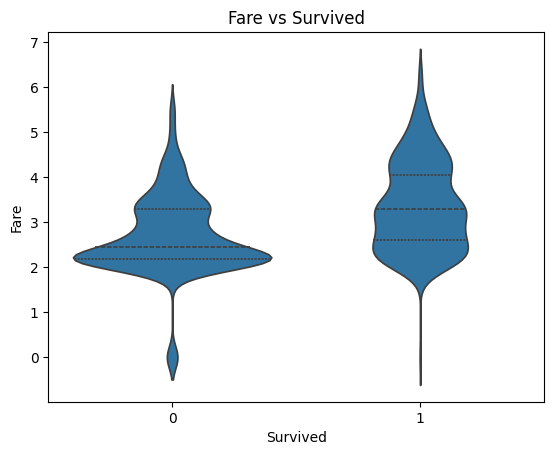

In [112]:
## `Fare_log` vs `Survived`
sns.violinplot(x="Survived",
               y="Fare_log",
               data=df5,
               inner="quart")

plt.title("Fare vs Survived")
plt.xlabel("Survived")
plt.ylabel("Fare")

plt.show()

Based on the results:
- `Age`: no difference in chance of survival
- `SibSp_log`: those with 0 siblings had lower chance of survival
- `Parch_log`: those with 0 parents had lower chance of survival
- `Fare_log`: lower fare was associated with lower chance of survival

#### 6.3.2 Interaction Effects

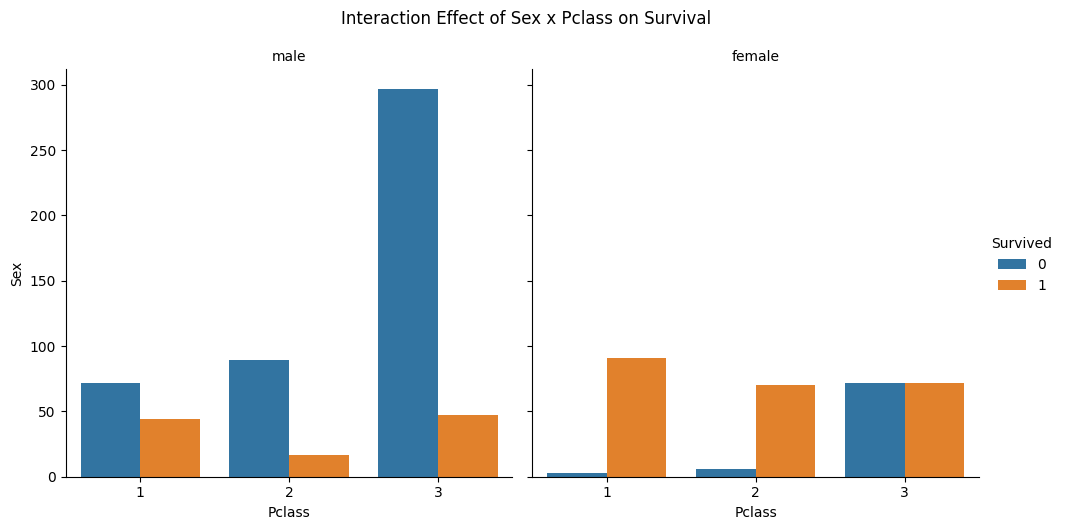

In [113]:
# visualise `Sex` x `PClass` on `Survived`
g1 = sns.catplot(x="Pclass",
                 hue="Survived",
                 col="Sex",
                 data=df5,
                 kind="count")

g1.figure.suptitle("Interaction Effect of Sex x Pclass on Survival", y=1.05)
g1.set_axis_labels("Pclass", "Sex")
g1.set_titles(col_template="{col_name}")

plt.show()

Based on the plot, there is an interaction effect of `Sex` x `Pclass`:
- Male passengers in class 3 had lower chance of survival
- Female passengers in classes 1 and 2 had higher chance of survival

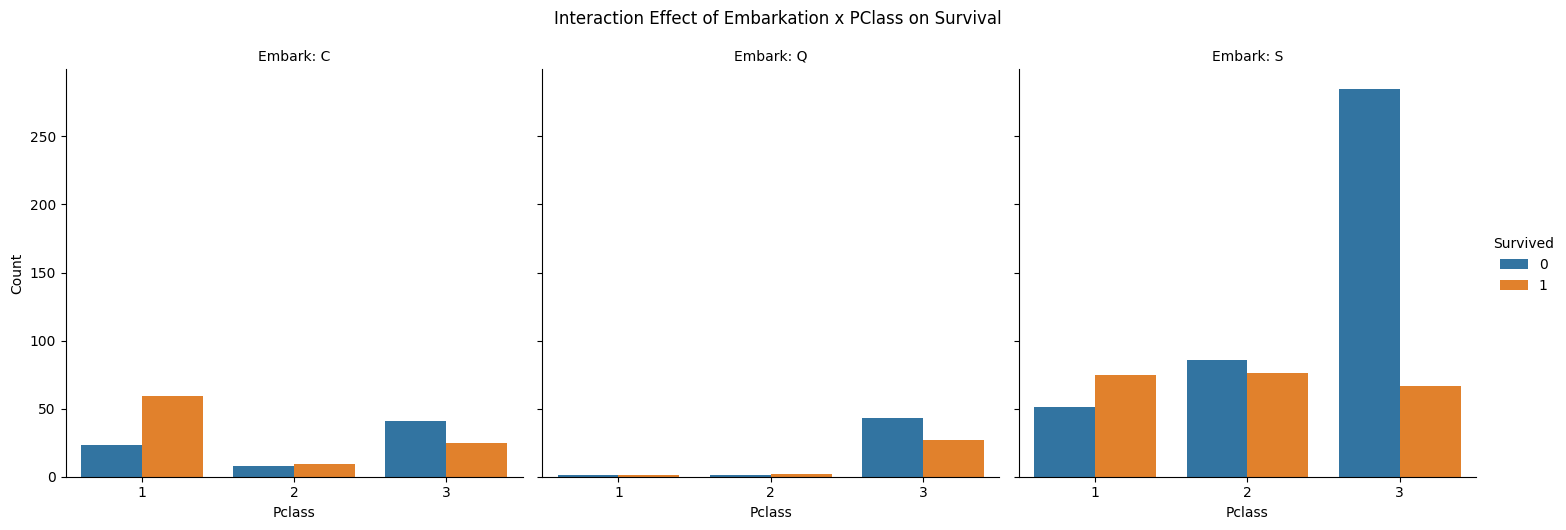

In [114]:
# visualise `Embark` vs `Pclass` on `Survived`

g2 = sns.catplot(x="Pclass",
                 col="Embarked",
                 hue="Survived",
                 data=df5,
                 kind="count")

g2.figure.suptitle("Interaction Effect of Embarkation x PClass on Survival", y=1.05)
g2.set_axis_labels("Pclass", "Count")
g2.set_titles(col_template="Embark: {col_name}")

plt.show()

Based on the plot, there is an interaction effect of `Embarked` x `Pclass`:
- Passengers in class 1 who embarked at C (Cherbourg) and S (Southampton) were slightly more likely to survive, while those embarked at Q (Queenstown) had equal chance of dying and surviving
- Passengers in class 3 who embarked at S (Southampton) were more likely to die.

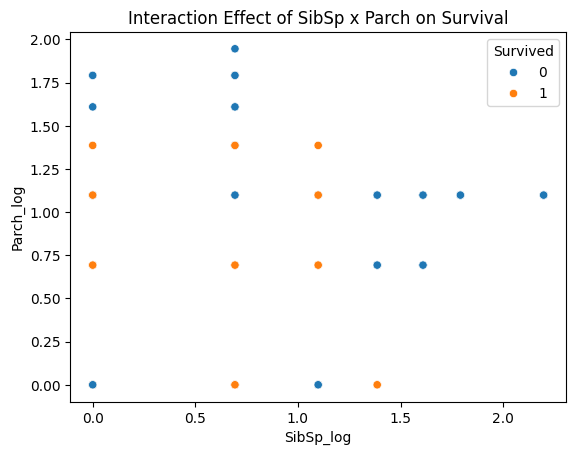

In [115]:
# visualise `SibSp_log` x `Parch_log` on `Survived`

sns.scatterplot(x="SibSp_log",
                y="Parch_log",
                hue="Survived",
                data=df5)

plt.title("Interaction Effect of SibSp x Parch on Survival")
plt.xlabel("SibSp_log")
plt.ylabel("Parch_log")

plt.show()

Based on the plot, there seems to be an interaction effect of `SibSp_log` x `Parch_log`:
- As the family size increased (higher number of siblings and parents), the chance of survival decreased

## 7. Feature Engineering

In [116]:
# make a copy of df5
df6 = df5.copy()

# get info on df6
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  880 non-null    int64   
 1   Survived     880 non-null    category
 2   Pclass       880 non-null    category
 3   Name         880 non-null    object  
 4   Sex          880 non-null    object  
 5   Age          880 non-null    float64 
 6   SibSp        880 non-null    int64   
 7   Parch        880 non-null    int64   
 8   Ticket       880 non-null    object  
 9   Fare         880 non-null    float64 
 10  Embarked     880 non-null    category
 11  SibSp_log    880 non-null    float64 
 12  Parch_log    880 non-null    float64 
 13  Fare_log     880 non-null    float64 
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 85.5+ KB


### 7.1 Encoding

In [117]:
# see which columns to encode

## instantiate a list of category and object columns
cat_and_obj_ivs = df6.select_dtypes(include=["category", "object"]).columns.tolist()

## remove `Name` and `Ticket` from the list
cat_and_obj_ivs = [col for col in cat_and_obj_ivs if col not in ["Name", "Ticket"]]

for iv in cat_and_obj_ivs:
    print(f"{iv}: {df6[iv].unique()} \n")

Survived: [0, 1]
Categories (2, int64): [0, 1] 

Pclass: [3, 1, 2]
Categories (3, int64): [1, 2, 3] 

Sex: ['male' 'female'] 

Embarked: ['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S'] 



I need to encode:
- `Sex`
- `Embarked`
- `Pclass`

In [118]:
# encode `Sex`

## instantiate the encoder
lab_encoder = LabelEncoder()

## fit the encoder and transform
df6["Sex_encoded"] = lab_encoder.fit_transform(df6["Sex"])

# check the results
df6[["Sex", "Sex_encoded"]].head(10)

,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
5,male,1
6,male,1
7,male,1
8,female,0
9,female,0


In [119]:
# encode `Embarked`

## fit the encoder and transform
df6["Embarked_encoded"] = lab_encoder.fit_transform(df6["Embarked"])

## check the results
df6[["Embarked", "Embarked_encoded"]].head(10)

,Embarked,Embarked_encoded
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2
5,Q,1
6,S,2
7,S,2
8,S,2
9,C,0


In [120]:
# encode `Pclass`

## fit the encoder and transform
df6["Pclass_encoded"] = lab_encoder.fit_transform(df6["Pclass"])

## check the results
df6[["Pclass", "Pclass_encoded"]].head(10)

,Pclass,Pclass_encoded
0,3,2
1,1,0
2,3,2
3,1,0
4,3,2
5,3,2
6,1,0
7,3,2
8,3,2
9,2,1


### 7.2 Create New Features

In [121]:
# create `Family_size`
df6["FamilySize"] = df6["SibSp"] + df6["Parch"]

# check results
df6[["SibSp", "Parch", "FamilySize"]].head(10)

,SibSp,Parch,FamilySize
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0
5,0,0,0
6,0,0,0
7,3,1,4
8,0,2,2
9,1,0,1


In [124]:
# create `IsAlone`
df6["IsAlone"] = (df6["FamilySize"] == 0).astype(int)

# check the results
df6[["FamilySize", "IsAlone"]].head(10)

,FamilySize,IsAlone
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,4,0
8,2,0
9,1,0


### 7.3 Scale Variables

In [125]:
## get info on df6
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 0 to 890
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       880 non-null    int64   
 1   Survived          880 non-null    category
 2   Pclass            880 non-null    category
 3   Name              880 non-null    object  
 4   Sex               880 non-null    object  
 5   Age               880 non-null    float64 
 6   SibSp             880 non-null    int64   
 7   Parch             880 non-null    int64   
 8   Ticket            880 non-null    object  
 9   Fare              880 non-null    float64 
 10  Embarked          880 non-null    category
 11  SibSp_log         880 non-null    float64 
 12  Parch_log         880 non-null    float64 
 13  Fare_log          880 non-null    float64 
 14  Sex_encoded       880 non-null    int64   
 15  Embarked_encoded  880 non-null    int64   
 16  Pclass_encoded    880 non-null 

In [128]:
# scale `Age`, `Fare`, `FamilySize`

## instantiate the scaler
scaler = StandardScaler()

## fit and transform
df6[["Age_scaled", "Fare_scaled", "FamilySize_scaled"]] = scaler.fit_transform(df6[["Age", "Fare", "FamilySize"]])

## check the results
df6[["Age", "Fare", "FamilySize", "Age_scaled", "Fare_scaled", "FamilySize_scaled"]].head(10)

,Age,Fare,FamilySize,Age_scaled,Fare_scaled,FamilySize_scaled
0,22.0,7.2500,1,-0.558834,-0.500783,0.054026
1,38.0,71.2833,1,0.745245,0.782122,0.054026
2,26.0,7.9250,0,-0.232814,-0.487259,-0.563419
3,35.0,53.1000,1,0.500730,0.417820,0.054026
4,35.0,8.0500,0,0.500730,-0.484755,-0.563419
5,28.0,8.4583,0,-0.069804,-0.476574,-0.563419
6,54.0,51.8625,0,2.049324,0.393027,-0.563419
7,2.0,21.0750,4,-2.188932,-0.223799,1.906363
8,27.0,11.1333,2,-0.151309,-0.422981,0.671472
9,14.0,30.0708,1,-1.210873,-0.043569,0.054026
